In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
#28x28 matris içeren bir resimlerin veri sedit mnist_784
from sklearn import datasets
X,y=datasets.fetch_openml('mnist_784',version=1,return_X_y=True)

In [ ]:
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [ ]:
#7000 satır 784 sütun y 7000 satır vektör
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


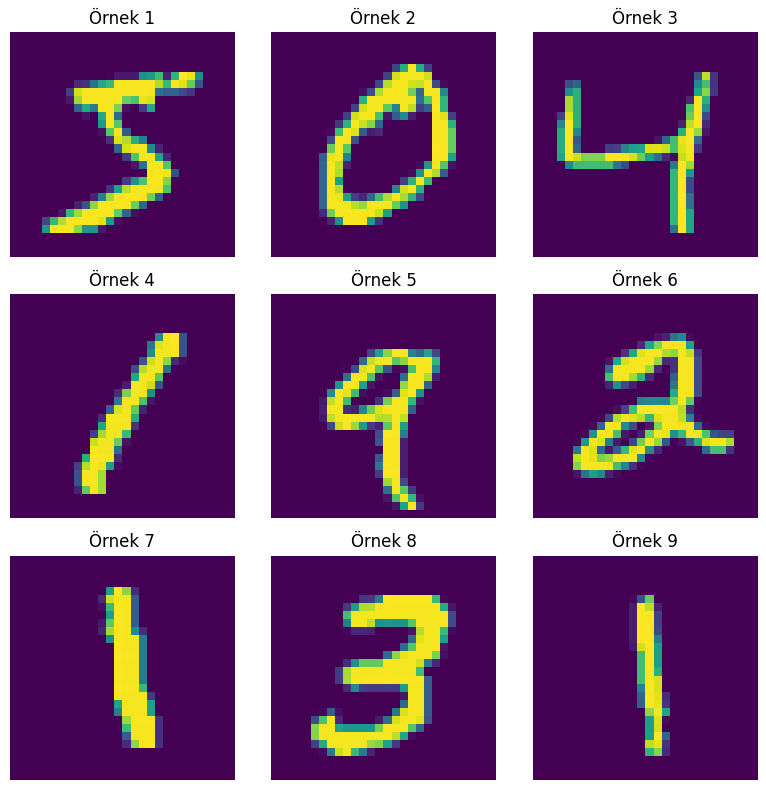

In [ ]:
#örnekleri görselleşitmre
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    digit = X.iloc[i]
    digit_pixels = np.array(digit).reshape(28, 28)
    ax.imshow(digit_pixels)
    ax.set_axis_off()
    ax.set_title(f"Örnek {i+1}")
plt.tight_layout()
plt.show()

In [ ]:
# Veri setinin eğitim ve test olarak ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Oluşturma**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# **Modeli Değerlendirme**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9165




*   Conifision Matrix (Hata matrisi)
  



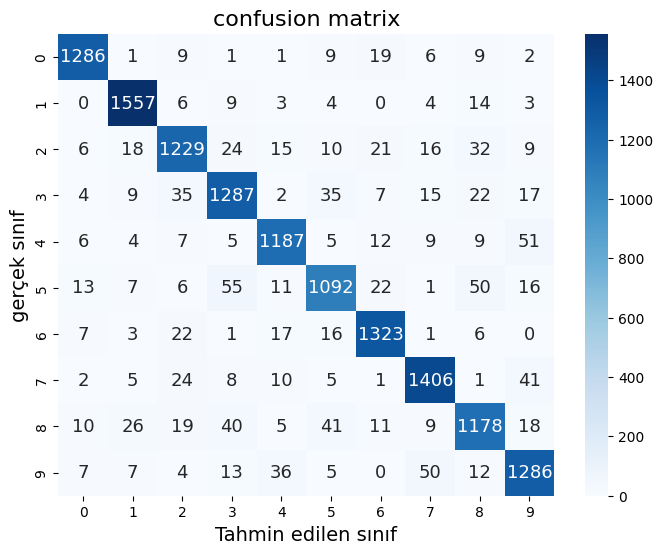

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#confusion matrix hesaplama
cm=confusion_matrix(y_test,y_pred)
#confusion matrix görseleştirme
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='d',annot_kws={"size": 13})
ax.set_title('confusion matrix', fontsize=16)
ax.set_xlabel('Tahmin edilen sınıf', fontsize=14)
ax.set_ylabel('gerçek sınıf', fontsize=14)
plt.show()

 # **Sonuç**

Saving 0.png to 0 (1).png
Saving 7ebbda50-d63b-4851-8104-c52643ba3e3a.jfif to 7ebbda50-d63b-4851-8104-c52643ba3e3a (2).jfif
Saving 8f290350-dea2-4196-bb32-789b36099903.jfif to 8f290350-dea2-4196-bb32-789b36099903 (2).jfif
Saving 9.jfif to 9 (1).jfif
Saving 9a49d95e-e1fe-4f96-9e25-eb9c15f5f56a.jfif to 9a49d95e-e1fe-4f96-9e25-eb9c15f5f56a (2).jfif
Saving 894ecc19-2037-4d20-9b26-fb0ac6c9fc0f.jfif to 894ecc19-2037-4d20-9b26-fb0ac6c9fc0f (2).jfif
Saving b5bc645f-cf55-4105-8818-f3131f427353.jfif to b5bc645f-cf55-4105-8818-f3131f427353 (2).jfif
Saving d6a43540-1267-4e89-be7c-1c0977dd9b92.jfif to d6a43540-1267-4e89-be7c-1c0977dd9b92 (2).jfif
Saving efd29765-c0dd-4855-bf16-1fdfd904aa8c.jfif to efd29765-c0dd-4855-bf16-1fdfd904aa8c (2).jfif
Saving fc3ff9d7-4487-4616-a2cd-368ebf4641d2.jfif to fc3ff9d7-4487-4616-a2cd-368ebf4641d2 (2).jfif
Saving fe423cfa-6485-4142-b84f-c72618eb69c7.jfif to fe423cfa-6485-4142-b84f-c72618eb69c7 (2).jfif


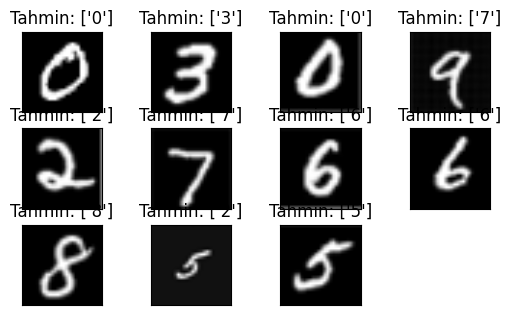

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
uploaded_images = []
uploaded = files.upload()
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((28, 28))
  img = img.convert('L')
  img_array = np.array(img).flatten()
  img_array = img_array.reshape(1, -1)
  uploaded_images.append(img_array)
for plot_index, i in enumerate(range(len(uploaded_images))):
  prediction = lr.predict(uploaded_images[i])
  p = plt.subplot(4,4, plot_index+1)
  p.imshow(uploaded_images[i].reshape(28,28), cmap=plt.cm.gray,interpolation='bilinear')
  p.set_xticks(()); p.set_yticks(())
  p.set_title(f'Tahmin: {prediction}')